In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s tomato # to list datasets contains tomato

No datasets found


In [2]:
# when google colab session is closed, data is lost which is downloaded from kaggle.
#So would like to upload images to google drive from kaggle.
from google.colab import drive

# Use drive._mount() instead of drive.mount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://www.kaggle.com/datasets/noulam/tomato

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:19<00:00, 289MB/s]
100% 2.70G/2.70G [00:19<00:00, 147MB/s]


In [ ]:
# This will unzip the zip file and push the files to mydrive in google drive
#!unzip new-plant-diseases-dataset.zip -d /content/drive/My\ Drive/Datasets/tomato_plant_disease/
#!unzip new-plant-diseases-dataset.zip #to unzip in colab itself

In [5]:
# train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
# validation_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [3]:
train_dir = '/content/drive/My Drive/Datasets/plant_disease/train/'
validation_dir = '/content/drive/My Drive/Datasets/plant_disease/valid/'

In [6]:
import os
# Filter subfolders that contain "tomato" in their names ## to consider only tomato plat disease images only
filtered_classes = [
    folder for folder in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, folder)) and "tomato" in folder.lower()
]

print("Filtered Classes:", filtered_classes)

Filtered Classes: ['Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot']


In [27]:
import tensorflow as tf

# Load training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    label_mode='categorical',  # Use 'categorical' for multi-class, 'int' for binary
    class_names=filtered_classes  # Explicitly specify classes, other images are excluded
)

Found 18345 files belonging to 10 classes.


In [28]:
print("Classes in the dataset:", train_dataset.class_names)

class_count = len(train_dataset.class_names)
classnames = train_dataset.class_names

Classes in the dataset: ['Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot']


In [9]:
# Load testing dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical',
    class_names=filtered_classes
)

Found 4585 files belonging to 10 classes.


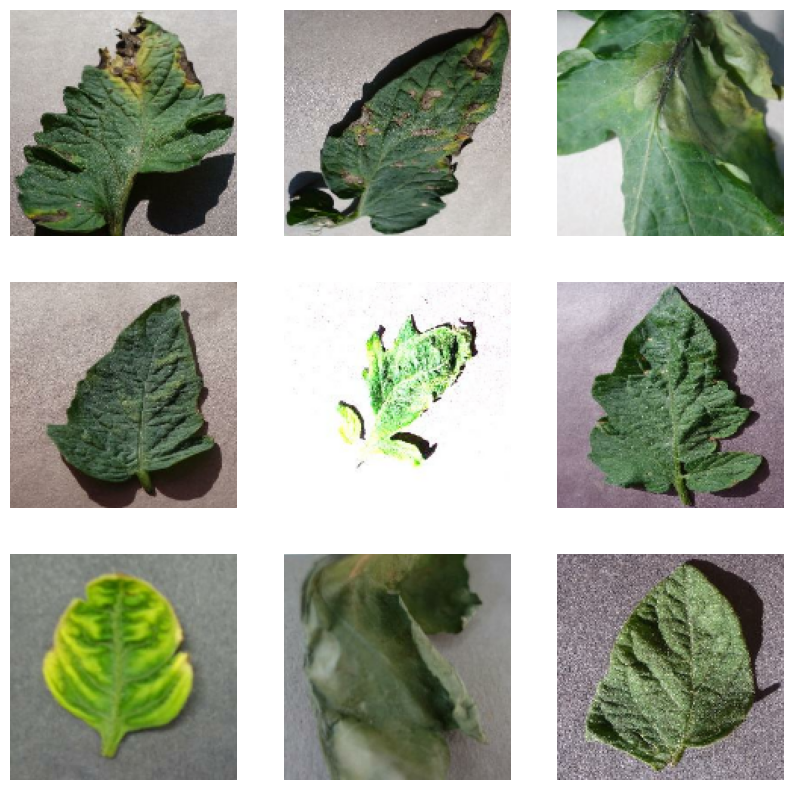

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1):
    #augmented_images = data_augmentation(images)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        #plt.imshow((augmented_images[i] * 255.0).numpy().astype("uint8"))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255.0)  # Normalize pixel values
    # ,tf.keras.layers.RandomRotation(0.1),  # Equivalent to rotation_range=30
    # tf.keras.layers.RandomWidth(0.2),  # Equivalent to width_shift_range=0.2
    # tf.keras.layers.RandomHeight(0.2),  # Equivalent to height_shift_range=0.2
    # tf.keras.layers.RandomZoom(0.2),  # Equivalent to zoom_range=0.2
    # tf.keras.layers.RandomFlip("horizontal")  # Equivalent to horizontal_flip
])

In [11]:
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [12]:
#The data_augmentation pipeline should not be applied to validation or test datasets.
val_dataset = validation_dataset.map(lambda x, y: (tf.keras.layers.Rescaling(1.0 / 255.0)(x), y))

In [13]:
resnetmodel = tf.keras.applications.ResNet50V2(include_top=False,input_shape=(150,150,3),weights = 'imagenet')
# Freeze the base model layers
for layers in resnetmodel.layers:
  layers.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#resnetmodel.summary()

In [12]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten,Dense,GlobalAveragePooling2D,Dropout


# model = Sequential()

# model.add(resnetmodel)
# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dense(class_count,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 5, 5, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,674,826 (139.90 MB)

 Trainable params: 13,110,026 (50.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [14]:
# we can use eithre above or the below syntax for adding layers
from tensorflow.keras.layers import Flatten,Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model

x = resnetmodel.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization
x = Dense(1024, activation='relu')(x)
predictions = Dense(class_count, activation='softmax')(x)

# Create the full model
model = Model(inputs=resnetmodel.input, outputs=predictions)

In [ ]:
#model.summary()

In [15]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(train_dataset,epochs=2,validation_data=val_dataset)

Epoch 1/2
574/574 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.1950 - loss: 2.6881 - val_accuracy: 0.5320 - val_loss: 1.4264
Epoch 2/2
574/574 ━━━━━━━━━━━━━━━━━━━━ 67s 51ms/step - accuracy: 0.4383 - loss: 1.6408 - val_accuracy: 0.6249 - val_loss: 1.1415


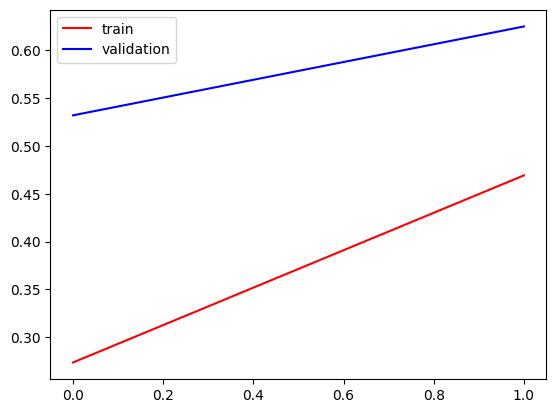

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

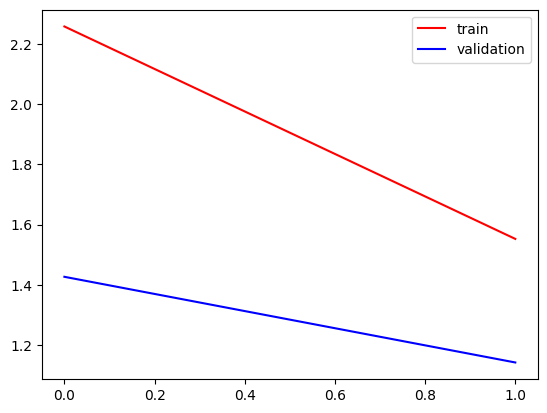

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
#!ls /content/drive/My\ Drive/Datasets/plant_disease/test/
!ls /content/test/test

AppleCedarRust1.JPG  CornCommonRust3.JPG     TomatoEarlyBlight2.JPG  TomatoYellowCurlVirus1.JPG
AppleCedarRust2.JPG  PotatoEarlyBlight1.JPG  TomatoEarlyBlight3.JPG  TomatoYellowCurlVirus2.JPG
AppleCedarRust3.JPG  PotatoEarlyBlight2.JPG  TomatoEarlyBlight4.JPG  TomatoYellowCurlVirus3.JPG
AppleCedarRust4.JPG  PotatoEarlyBlight3.JPG  TomatoEarlyBlight5.JPG  TomatoYellowCurlVirus4.JPG
AppleScab1.JPG	     PotatoEarlyBlight4.JPG  TomatoEarlyBlight6.JPG  TomatoYellowCurlVirus5.JPG
AppleScab2.JPG	     PotatoEarlyBlight5.JPG  TomatoHealthy1.JPG      TomatoYellowCurlVirus6.JPG
AppleScab3.JPG	     PotatoHealthy1.JPG      TomatoHealthy2.JPG
CornCommonRust1.JPG  PotatoHealthy2.JPG      TomatoHealthy3.JPG
CornCommonRust2.JPG  TomatoEarlyBlight1.JPG  TomatoHealthy4.JPG


In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Specify the image path
img_path = '/content/test/test/TomatoEarlyBlight2.JPG'  # Change this to the actual path

# Load the image and resize it to 150x150 (matching your model input size)
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to an array
img_array = image.img_to_array(img)

# Normalize pixel values to [0, 1]
img_array /= 255.0

# Add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Predict the class of the image
predictions = model.predict(img_array)

# Get the index of the highest predicted probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Use the class names from the dataset
predicted_class_label = classnames[predicted_class_index]

# Print the predicted class and probability
print("Predicted Class:", predicted_class_label)
print("Predicted Class Probability:", predictions[0][predicted_class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class: Tomato___Late_blight
Predicted Class Probability: 0.75974476
